## <span style="color:#000066"> Question 10: Boston Dataset </span> 

In this section we will explore Boston Dataset. We will cover basic **Exploratory Data Analysis**<br>

Assumption: Reader has basic understanding of python and statistics.


*Suggestion: This tutorial should be read in conjunction with Chapter2-Q8 of ISLR* --> http://faculty.marshall.usc.edu/gareth-james

In [1]:
from chapter2_imports import *

### Loading Data

In [2]:
import sklearn
from sklearn.datasets import load_boston
boston_data = load_boston()

### Description

- As we load **Boston data** from sklearn we also get details of the dataset which could be easily accessed as below.

In [3]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Exploring Data

- We will start by exploring Boston dataset by looking att first few rows.

In [4]:
boston_dataset = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_dataset['MEDV'] = boston_data.target
boston_dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

- Lets explore properties of dataset. No. of rows and columns and thier corresponding types.

In [5]:
boston_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- Quickly glancing through the basictastical summary fo the dataset

In [6]:
boston_dataset.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
MEDV      25.000000   50.0000

- Creating **CHAS- -Charles River dummy variable** as category variable instead of numeric and looking at the porperties of column.

In [7]:
boston_dataset['CHAS'] = boston_dataset['CHAS'].astype('category')
boston_dataset['CHAS'].describe()

count     506.0
unique      2.0
top         0.0
freq      471.0
Name: CHAS, dtype: float64

### Exploratory Data Analysis

#### Complete data summary using Pair plot

- Pair plot is the best place to start visualizing the data. It not only give details about each column but also gives idea on how different columns are related to each other.
    - Upper traingle give scatter plot to depict relationship between variables pair wise.
    - Diagonal is historgram to provide about distribution of data for particular column.
    - Lower traingle is *Kernal Density Estimate* plot. It gives idea on bivariant distribution of two variables.

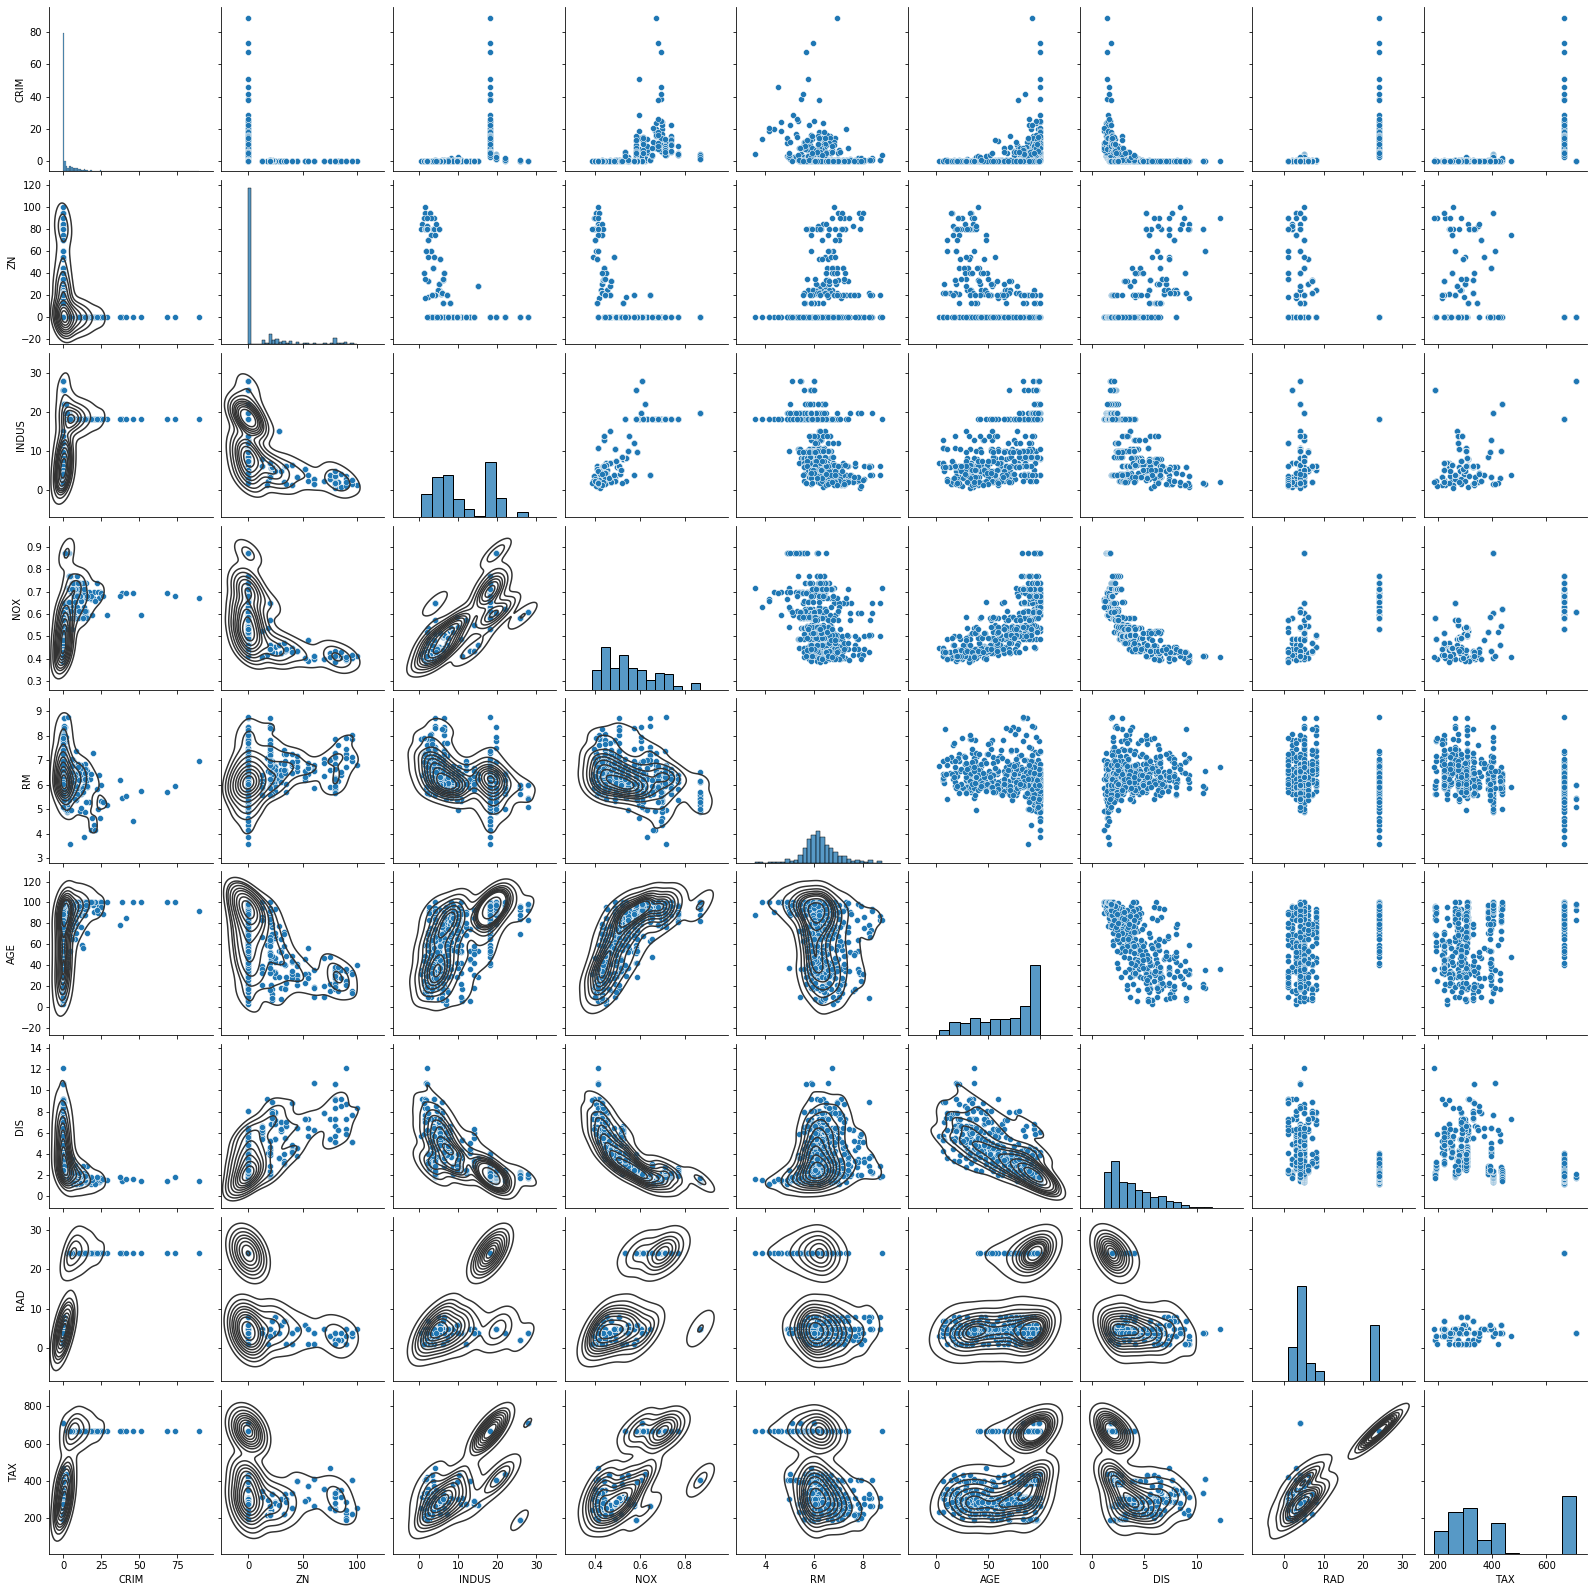

In [8]:
g = sns.pairplot(boston_dataset.iloc[:, :10])
g.map_lower(sns.kdeplot, color=".2")
plt.show()

#### Analysing the relation of CRIM ( per capita crime rate by town) with other variables.

- Looking at correlation to identify any linear relationship

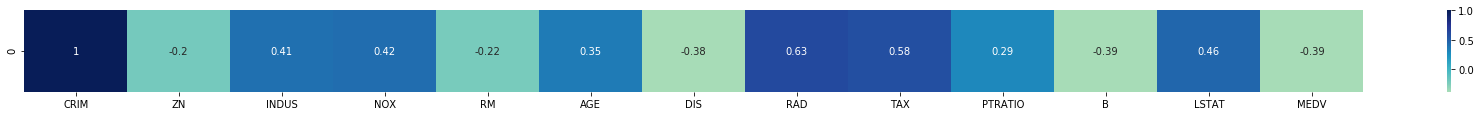

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(30,1.5))
sns.heatmap(boston_dataset.corrwith(boston_dataset['CRIM']).to_frame().T,
            center=0,
            cmap="YlGnBu",
            annot=True)
plt.show()

- Visulaizing relationship of *CRIM* with other variables.

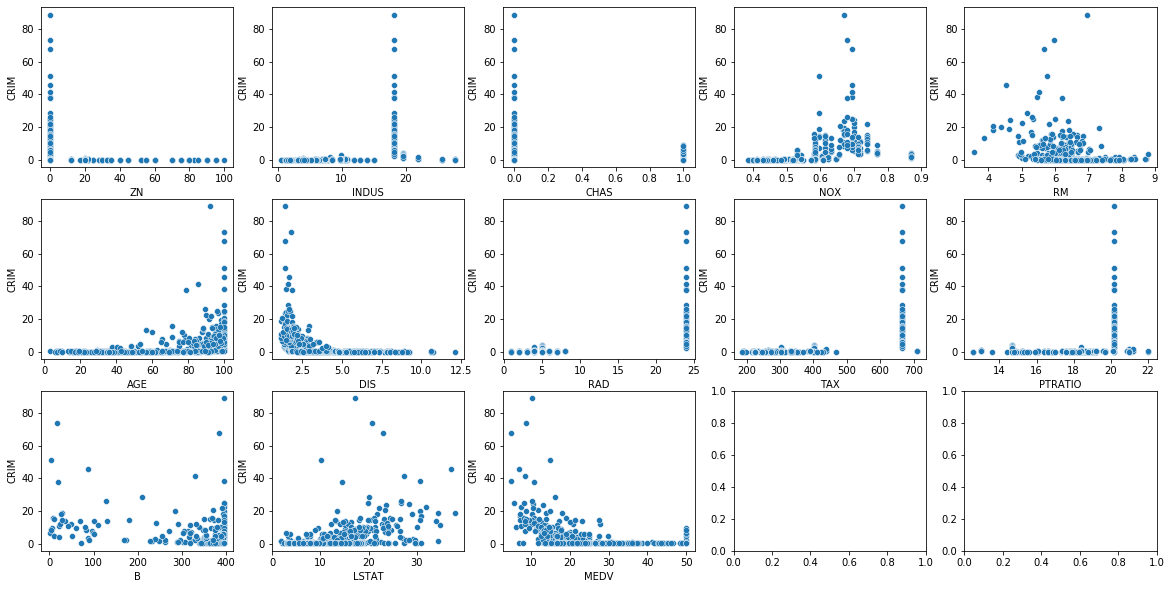

In [10]:
fig, ax = plt.subplots(len(boston_dataset.columns[1:])//5 + 1, 5, figsize=(20, 10))
for i, column_name in enumerate(boston_dataset.columns[1:]):
        sns.scatterplot(x=column_name, y='CRIM', data=boston_dataset, ax=ax[i//5][i%5])

- Looking at distribution and top 5 value of *CRIM, TAX and PTRATIO* to analyze extreme values in each variable.

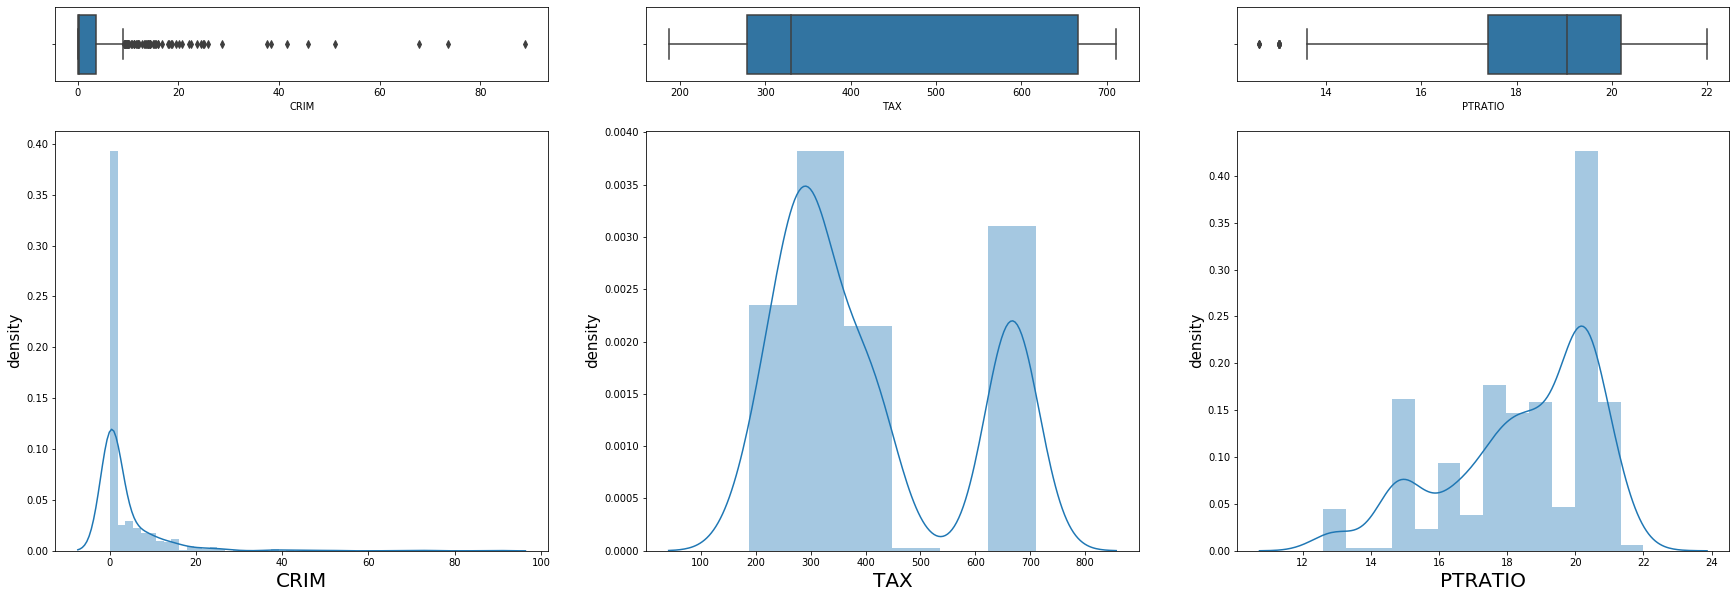

In [11]:
fig, ax = plt.subplots(2, 3, 
                       gridspec_kw={"height_ratios": (.15, .85)},
                       figsize=(30, 10))
for i, column_names in enumerate(['CRIM', 'TAX', 'PTRATIO']):
    sns.boxplot(boston_dataset[column_names], ax=ax[0][i])
    g = sns.distplot(boston_dataset[column_names], ax=ax[1][i])
    g.set_ylabel('density', fontsize=15)
    g.set_xlabel(column_names, fontsize=20)

In [52]:
def formatter(input_value):
    return 'background-color: grey'
df = boston_dataset.iloc[boston_dataset['CRIM'].nlargest(5).index, :]
df.style.format('{0:,.3f}').applymap(formatter, subset=['CRIM']).set_caption('CRIM Top 5:')

In [55]:
df = boston_dataset.iloc[boston_dataset['TAX'].nlargest(5).index, :]
df.style.format('{0:,.3f}').applymap(formatter, subset=['TAX']).set_caption('TAX Top 5:')

In [56]:
df = boston_dataset.iloc[boston_dataset['PTRATIO'].nlargest(5).index, :]
df.style.format('{0:,.3f}').applymap(formatter, subset=['PTRATIO']).set_caption('PTRATIO Top 5:')

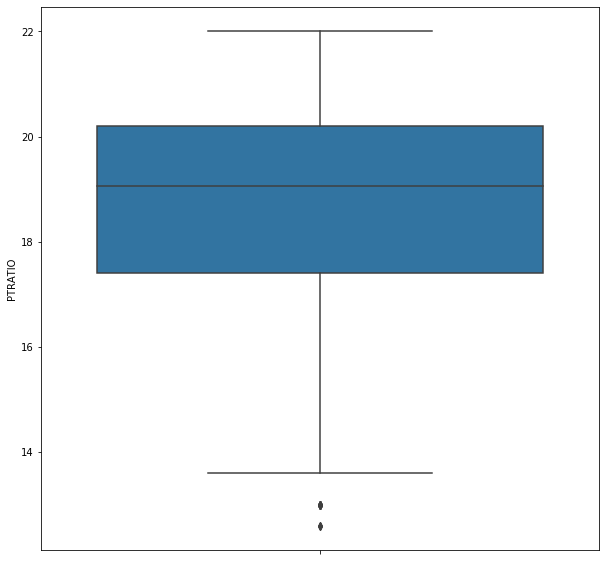

In [15]:
sns.boxplot(y='PTRATIO', data=boston_dataset)
plt.show()

Row with lowest median value for owner occupied homes is 398


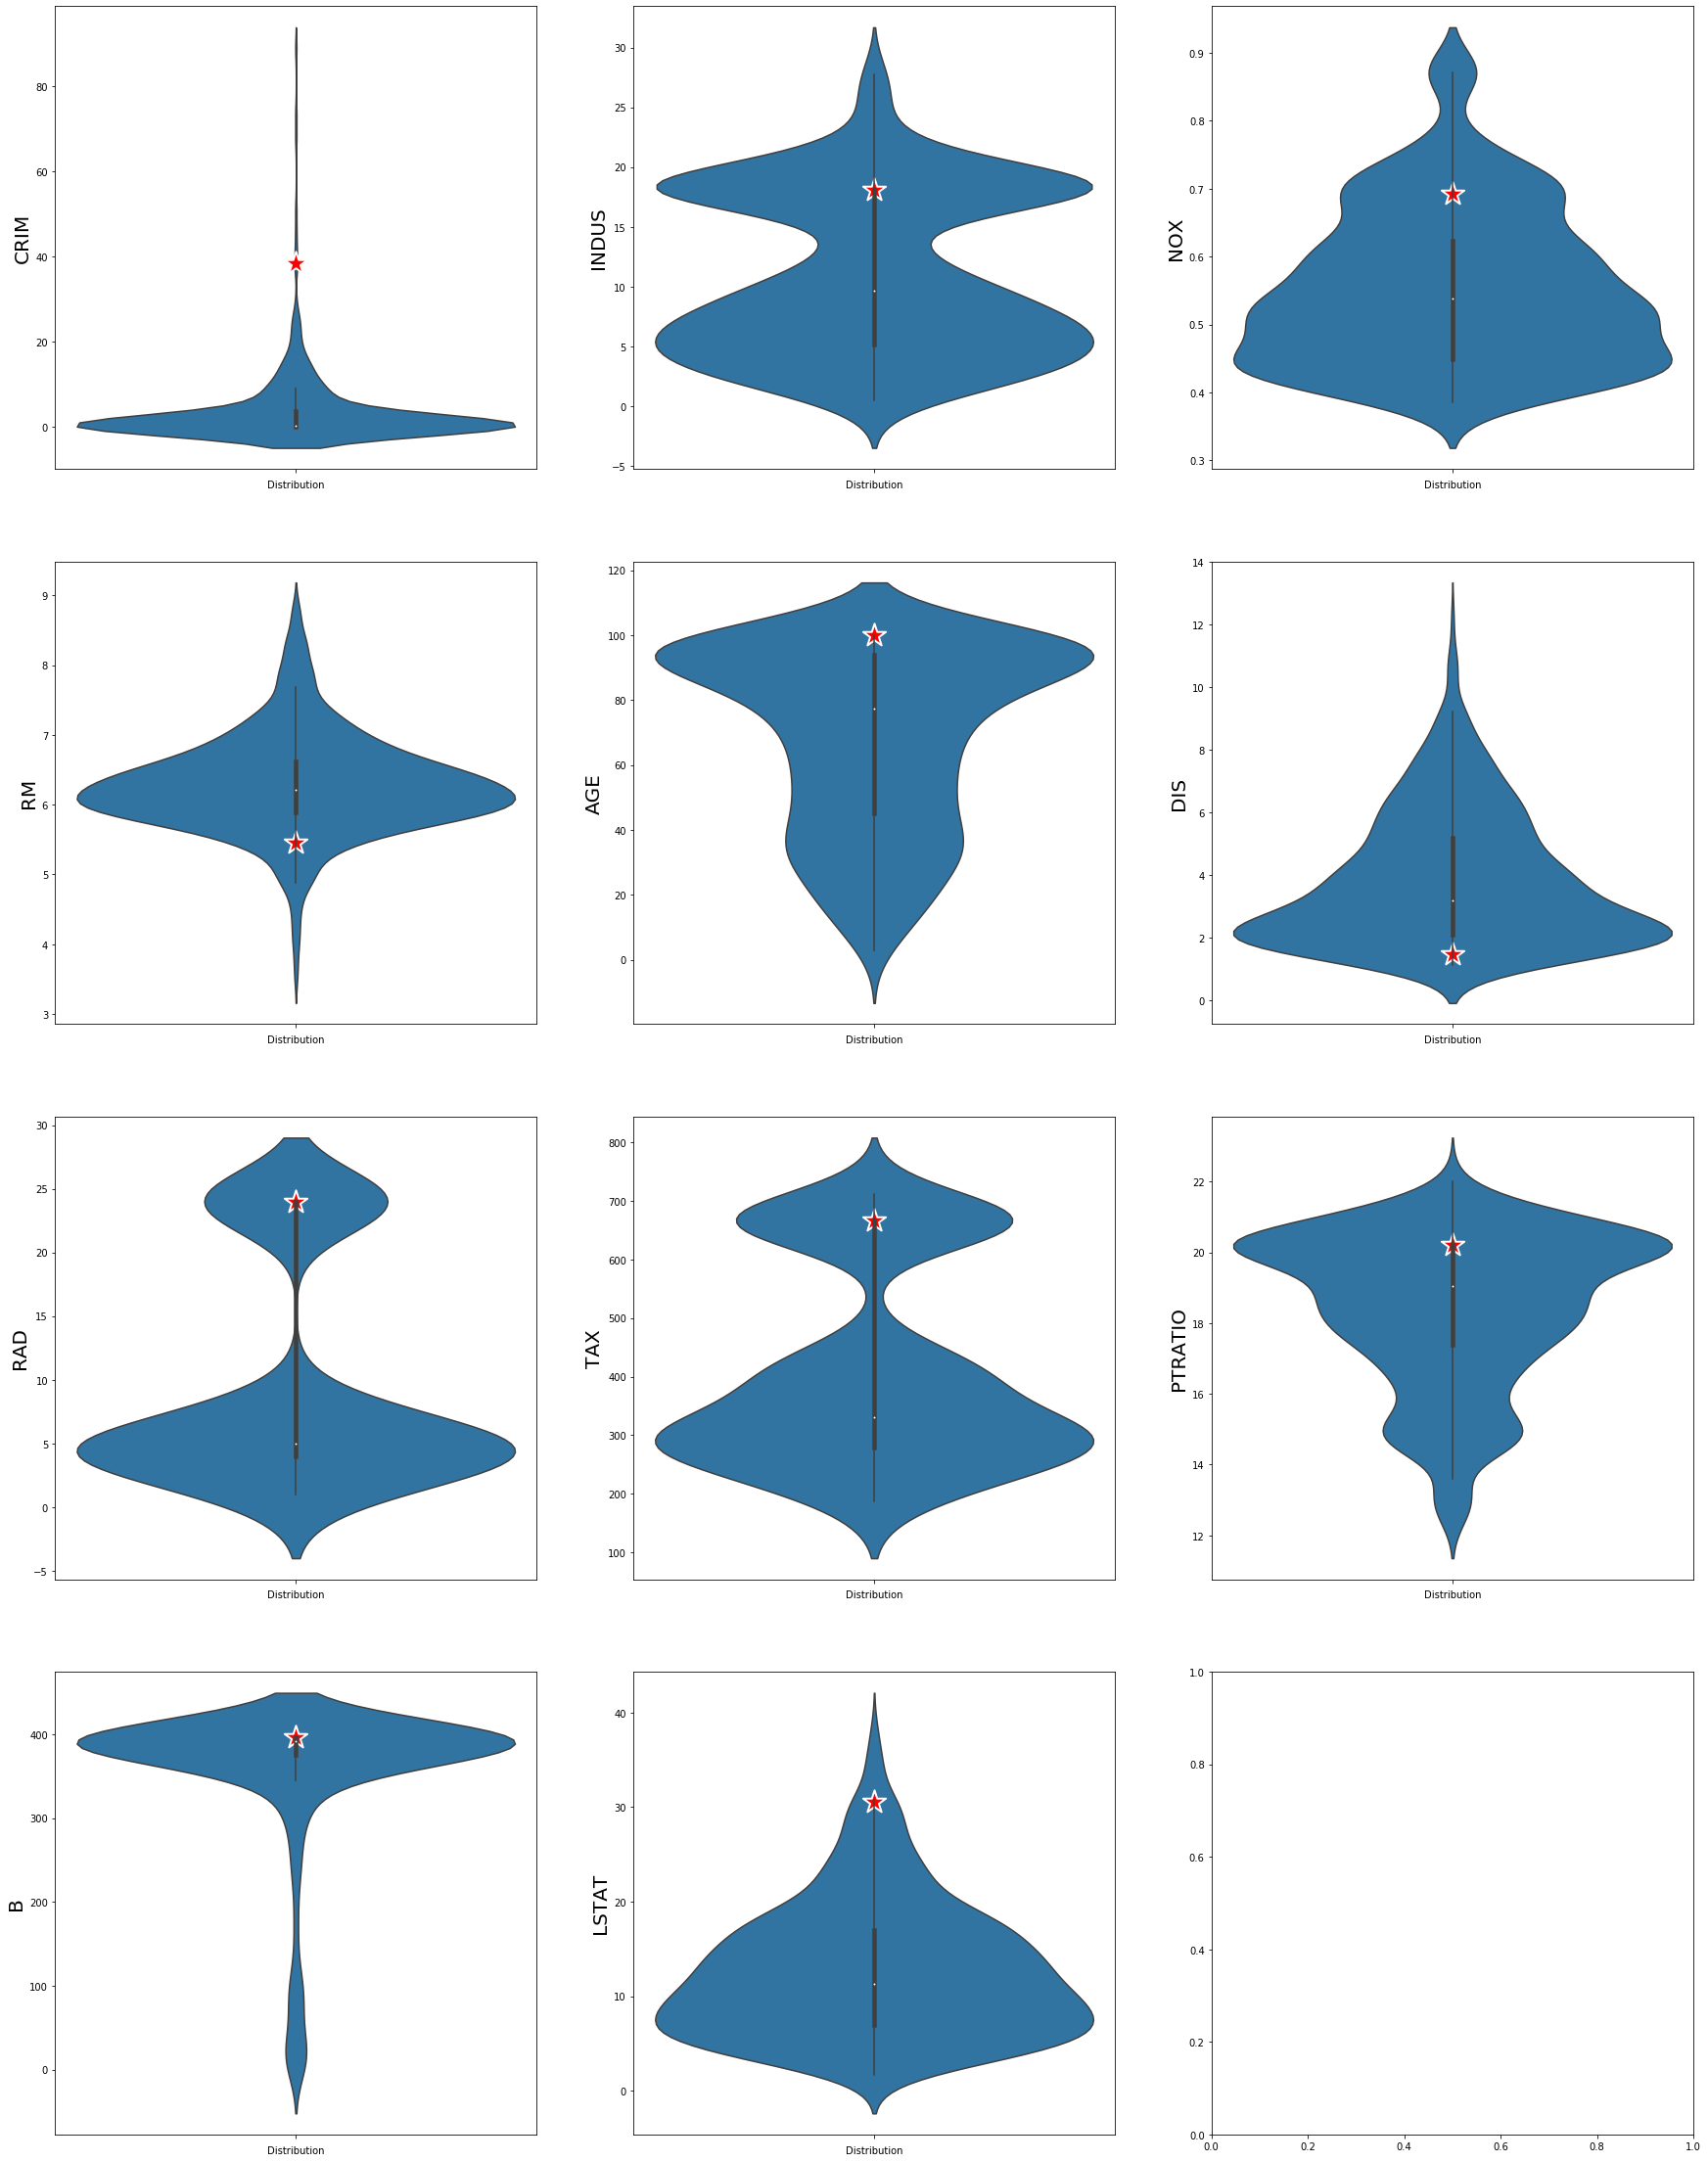

In [16]:
min_value_row = boston_dataset.MEDV.idxmin()
fig, ax =plt.subplots(4, 3, figsize=(30, 40))
for i, column_names in enumerate(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']):
    g = sns.violinplot(y=column_names, data=boston_dataset, ax=ax[i//3][i%3])
    h = sns.scatterplot(y=column_names, x='CHAS', 
                    data=boston_dataset.iloc[min_value_row:(min_value_row+1), :],
                    color='Red',
                    marker='*',
                    s=600,
                    ax=ax[i//3][i%3])
    g.set_ylabel(column_names, fontsize=20)
    h.set_xlabel('Distribution', fontsize=10)
print(f"Row with lowest median value for owner occupied homes is {min_value_row}")

In [17]:
summary_with_min_value = boston_dataset.describe().T
summary_with_min_value['Min_House_Value'] = boston_dataset.iloc[min_value_row, :]
summary_with_min_value

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  Min_House_Value  
CRIM       3.677083   88.9762          38.3518  
ZN        12.500000  100.0000           0.0000  
INDUS     18.100000   27.7400          18.1000  
NOX        0.624000    0.8710           0.6930  
RM         6.623500    8.7800           5.4530  
AGE       94.075000  100.0000         100.0000  
DIS        5.188425   12.1265           1.4896  
RAD       24.000000   24.0000          24.0000  
TAX      666.000000  711.0000         666.0000  
PTRATIO   20.200000   22.0000          20.2000  
B        396.225000  396.9000         396.9000  
LSTAT     16.955000   37.9700          30.5900  
MEDV      25.000000   50.0000           5.0000

In [18]:
boston_dataset['above_eight_RM'] = np.where(boston_dataset.RM > 8, 1, 0)

In [19]:
boston_dataset['above_eight_RM'] = boston_dataset['above_eight_RM'].astype('category')
boston_dataset['above_eight_RM'].describe()

count     506
unique      2
top         0
freq      493
Name: above_eight_RM, dtype: int64

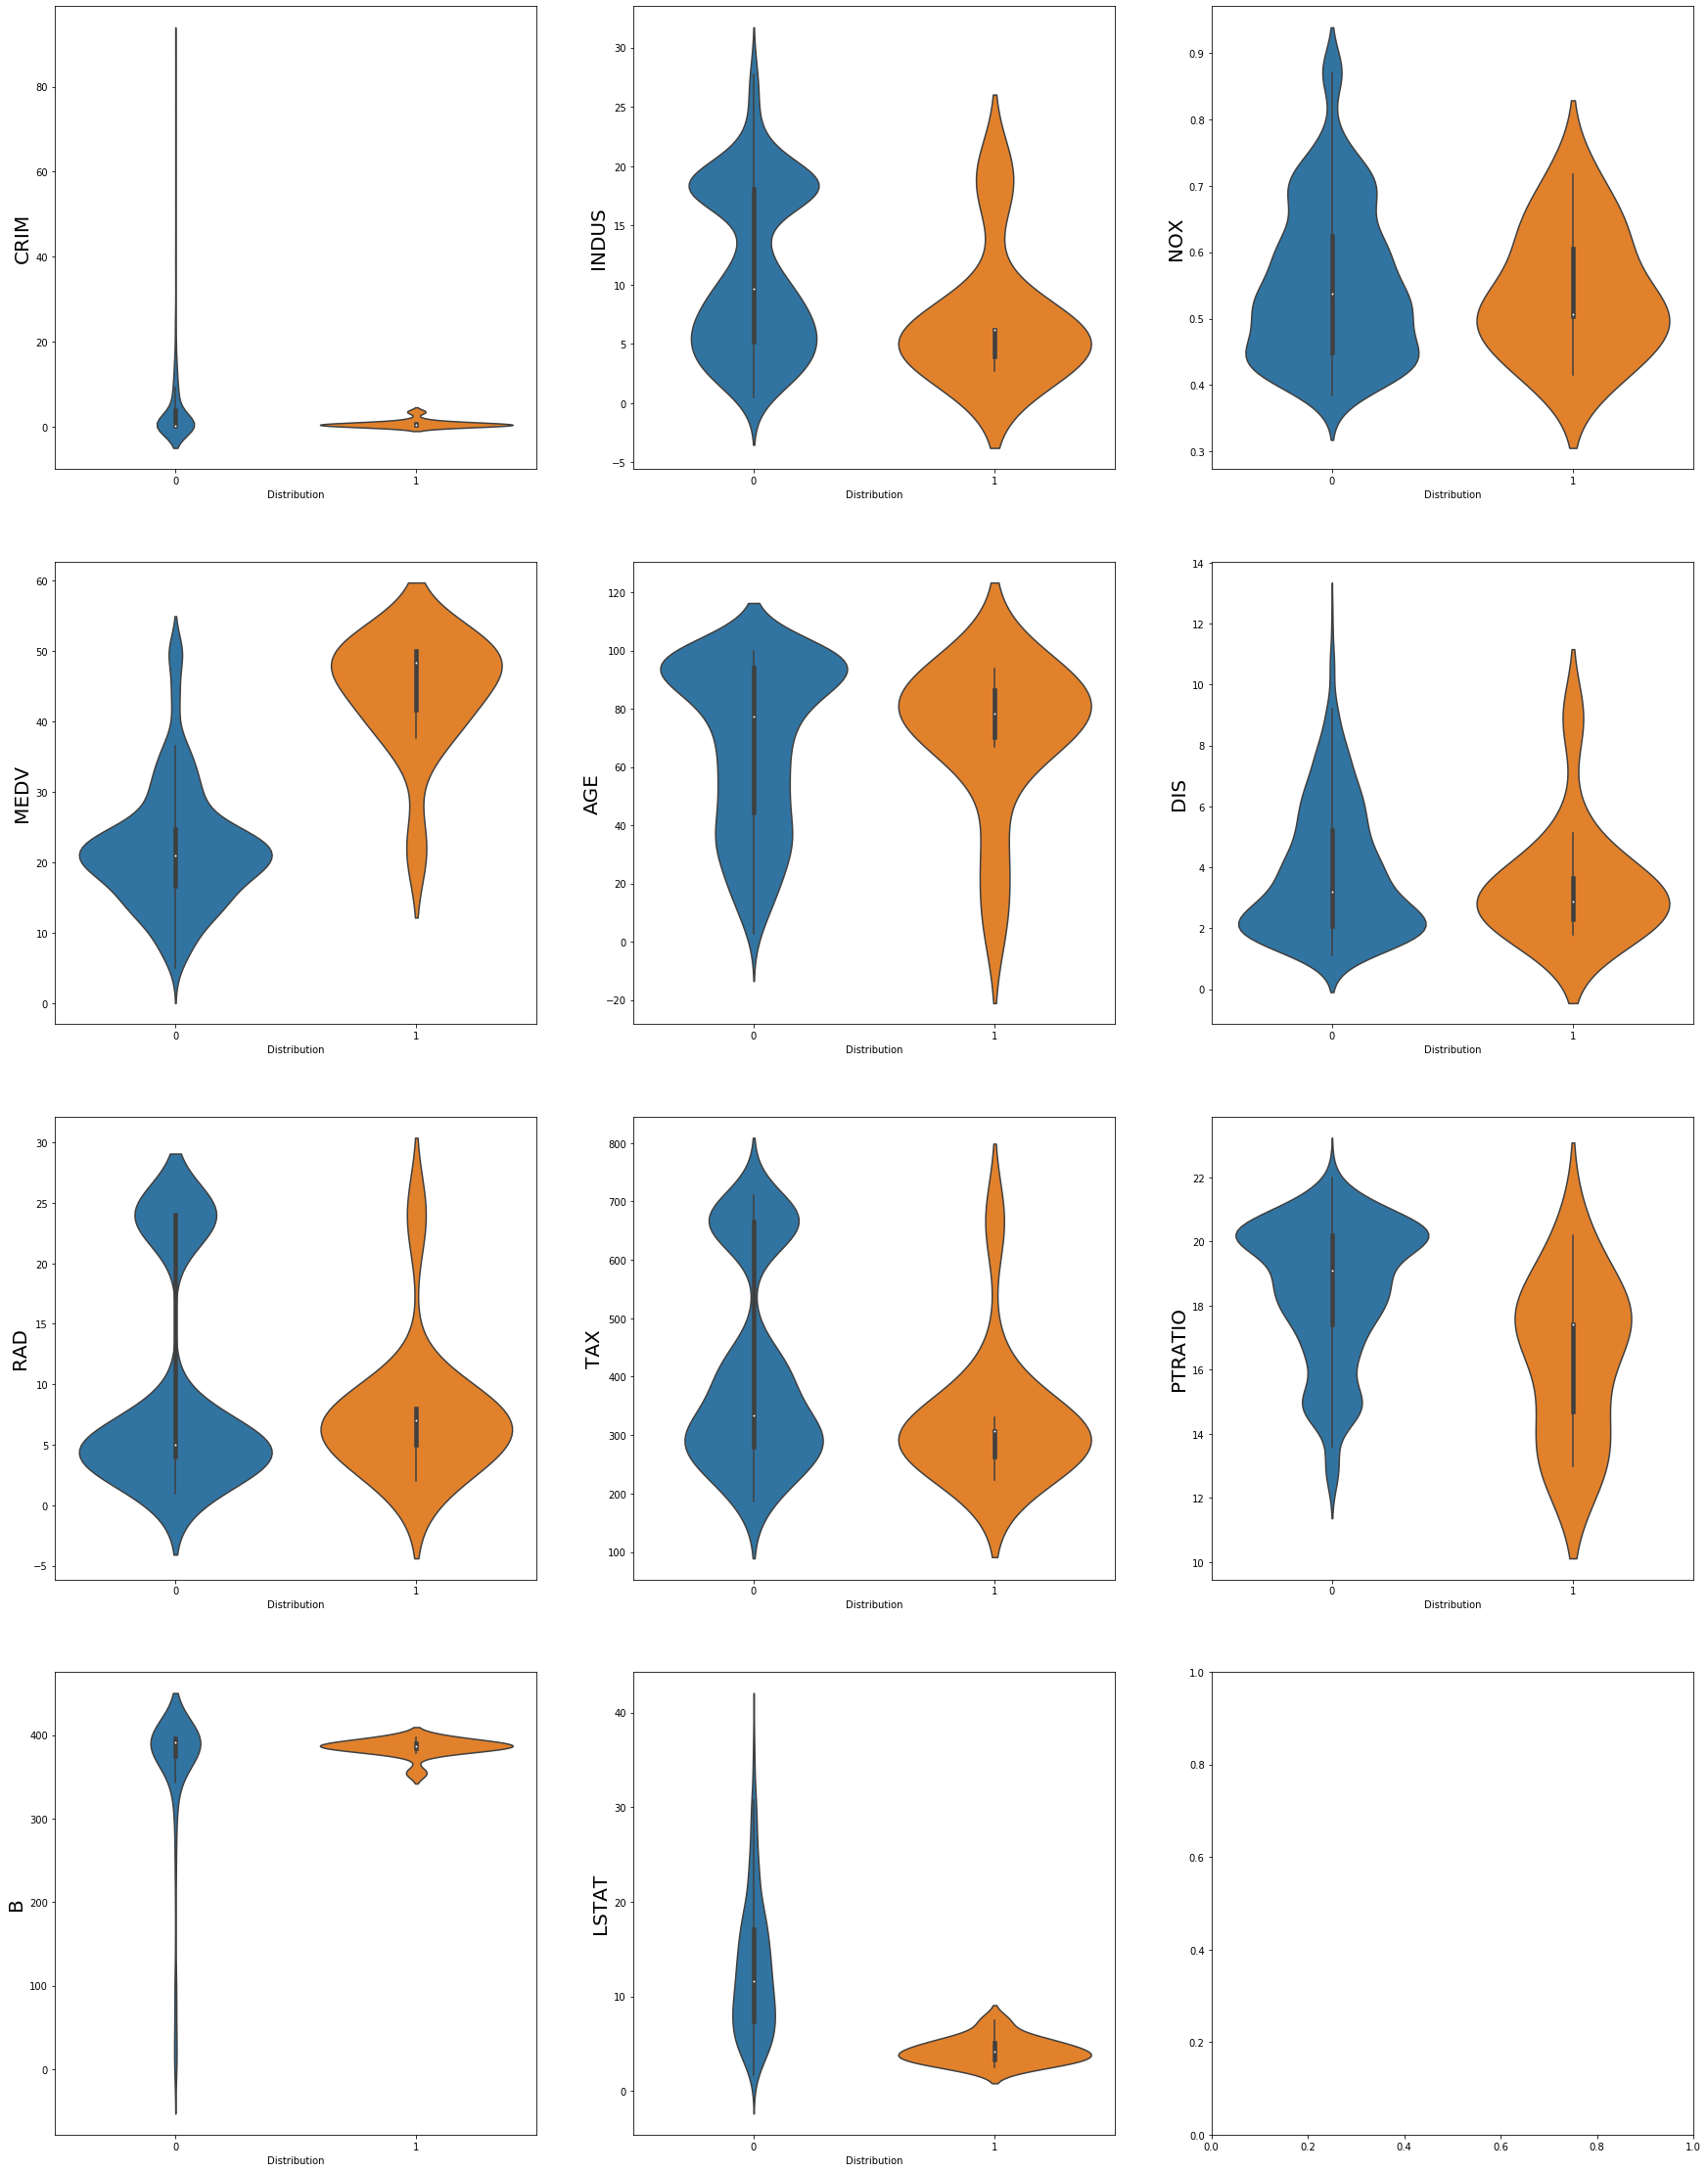

In [20]:
fig, ax =plt.subplots(4, 3, figsize=(30, 40))
for i, column_names in enumerate(['CRIM', 'INDUS', 'NOX', 'MEDV', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']):
    g = sns.violinplot(y=column_names, x='above_eight_RM', data=boston_dataset, ax=ax[i//3][i%3])
    g.set_ylabel(column_names, fontsize=20)
    g.set_xlabel('Distribution', fontsize=10)